Jason Cain, Nathan Harms, Marissa Puzan
## Serotonin transport modeling 


Laminar flow model:

## $$ \frac{C_m}{C_o} = \sum_{n} M_n e^{- \beta^2 Gz} $$



from
$$v_z \frac{\partial C}{\partial z} = D \frac{1}{r} \frac{\partial}{\partial r} \left( r \frac{\partial C}{\partial r} \right)$$
where 

$$ Gz = \frac{D L}{V_m R^2} $$

$$ P_w^* = P_w \left( \frac{R}{D} \right) $$

$$ M_n = f( P_w^* ) $$ 

$$ \beta = f( P_w^* ) $$ 

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from collections import namedtuple

In [2]:
import laminarFlow


In [3]:

ConditionSet = namedtuple('ConditionSet', ['Concentration', 'Diffusivity', 'Permeability'])
KineticsParamers = namedtuple('ConditionSet', ['vmax1', 'Km1', 'K1', 'vmax2', 'Km2', 'K2'])


serCondition = ConditionSet(
                Concentration = 0,
                Diffusivity = 6.2424e-8,
                Permeability =7.576e-13)

trypCondition = ConditionSet(
                Concentration = .1,
                Diffusivity = 5.386e-8,
                Permeability = 6.44e-4)

htpCondition = ConditionSet(
                Concentration = 0,
                Diffusivity = 4.995e-8,
                Permeability = 7.576e-13)

kinetics = KineticsParamers(vmax1 = 0.1868167,
                            Km1 = 1.43533284,
                            K1 = 0.43680929,
                            vmax2 = 9.97704964,
                            Km2 = 2.37430847,
                            K2 = 0.25340153)

wallKinetics = KineticsParamers(vmax1 = 0.1868167,
                            Km1 = 1.43533284,
                            K1 = 0.43680929,
                            vmax2 = 9.97704964,
                            Km2 = 2.37430847,
                            K2 = 0.25340153)

# kinetics = KineticsParamers(vmax1 = 0,
#                             Km1 = 1,
#                             K1 = 1,
#                             vmax2 = 0,
#                             Km2 = 1,
#                             K2 = 1)

# wallKinetics = KineticsParamers(vmax1 = 0,
#                             Km1 = 1,
#                             K1 = 1,
#                             vmax2 = 0,
#                             Km2 = 1,
#                             K2 = 1)

radius = 2.5/2/100
length = 7.5
max_velocity = .0287/60
timestep = 60/3600
rings = 20
sections = 500

Model = laminarFlow.LaminarFlow(length, radius, max_velocity, trypCondition, htpCondition, serCondition, kinetics, wallKinetics, rings, sections, timestep)

/Users/Cain/Code/CompModeling/Serotonin_Fun/serotonin-transport/laminarFlow.py:263: RuntimeWarning: divide by zero encountered in true_divide
  first_der[i,:] = first_der[i,:]/rArray[i]
/Users/Cain/Code/CompModeling/Serotonin_Fun/serotonin-transport/laminarFlow.py:263: RuntimeWarning: invalid value encountered in true_divide
  first_der[i,:] = first_der[i,:]/rArray[i]
/Users/Cain/Code/CompModeling/Serotonin_Fun/serotonin-transport/laminarFlow.py:252: RuntimeWarning: invalid value encountered in subtract
  return (Zleft - 2*Zcenter + Zright)/(dz**2)
/Users/Cain/Code/CompModeling/Serotonin_Fun/serotonin-transport/laminarFlow.py:264: RuntimeWarning: invalid value encountered in subtract
  return (Ztop - 2*Zcenter + Zbottom)/(dr**2) + first_der
/Users/Cain/Code/CompModeling/Serotonin_Fun/serotonin-transport/reactionKinetics.py:10: RuntimeWarning: invalid value encountered in multiply
  dcTry = -k1fwd*cTry + k1rev*c5HTP


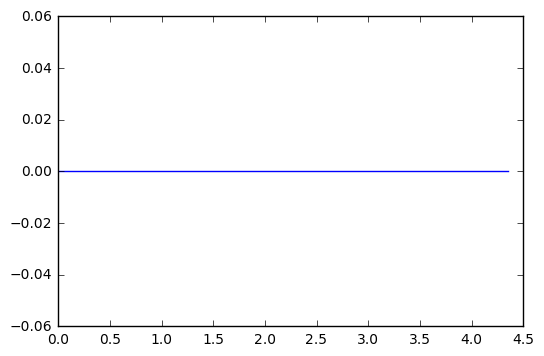

In [4]:
plt.plot( Model.time, Model.serotoninUptake)

In [12]:
print(Model.serConcentration[:,-1,0:20])

print(Model.time)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[ 0.          0.01666667  0.03333333  0.05        0.06666667  0.08333333
  0.1         0.11666667  0.13333333  0.15        0.16666667  0.18333333
  0.2         0.21666667  0.23333333  0.25        0.26666667  0.28333333
  0.3         0.31666667  0.33333333  0.35        0.36666667  0.38333333
  0.4         0.41666667  0.43333333  0.45        0.46666667  0.48333333
  0.5         0.51666667  0.53333333  0.55        0.56666667  0.58333333
  0.6         0.61666667  0.63333333  0.65        0.66666667  0.68333333
  0.7         0.71666667  0.73333333  0.75        0.76666667  0.78333333
  0.8         0.81666667  0.83333333  0.85        0.86666667  0.88333333
  0.9         0.91666667  0.93333333  0.95        0.96666667  0.98333333
  1.          1.01666667  1.03333333  1.05        1.06666667  1.083333

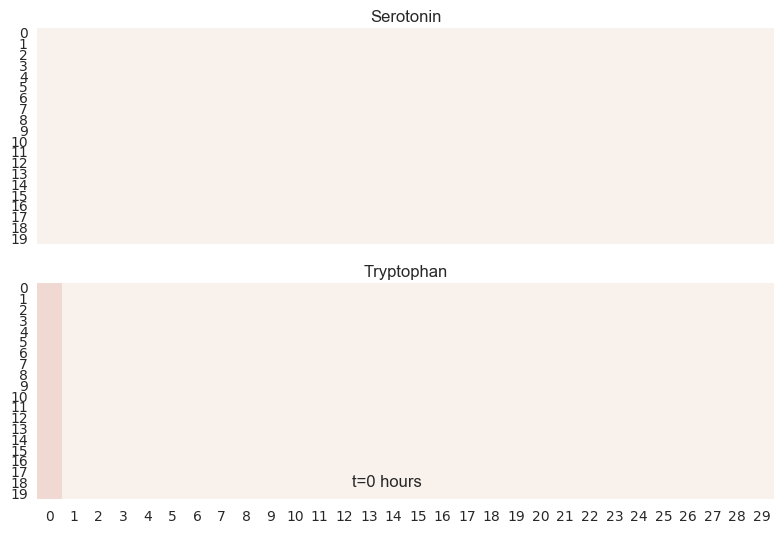

In [10]:
from matplotlib import animation
import matplotlib
import seaborn as sns


matplotlib.rc('animation', html='html5')
fig, axarr = plt.subplots(2, sharex = True)
timestamp = fig.text(0.45,0.1,'timestamp')
frames = 120
def animate(i):
    step = i * len(Model.time)//(frames)
    serotonin = Model.serConcentration[step,:,:30]
    tryp = Model.trypConcentration[step,:,:30]
    sns.heatmap(serotonin, vmin=0,vmax=1, ax=axarr[0], cbar = None)
    axarr[0].set_title('Serotonin')
    sns.heatmap(tryp, vmin=0,vmax=1, ax=axarr[1], cbar=None)
    axarr[1].set_title('Tryptophan')
    timestamp.set_text('t={0:.0f} hours'.format(Model.time[step]))
    plt.tight_layout()
    
anim = animation.FuncAnimation(fig, animate, frames=frames, repeat_delay=2000, repeat=True)
anim

In [7]:
from SALib.sample.saltelli import sample as ss
from SALib.analyze.sobol import analyze as sa


In [8]:
def laminarModel(data):
    trypCondition = ConditionSet(
                Concentration = data[3],
                Diffusivity = data[4],
                Permeability = data[5])

    htpCondition = ConditionSet(
                Concentration = data[6],
                Diffusivity = data[7],
                Permeability = data[8])

    serCondition = ConditionSet(
                Concentration = data[9],
                Diffusivity = data[10],
                Permeability = data[11])
    
    kinetics = KineticsParamers(vmax1 = data[12],
                            Km1 = data[13],
                            K1 = data[14],
                            vmax2 = data[15],
                            Km2 = data[16],
                            K2 = data[17])
    
    wallKinetics = KineticsParamers(vmax1 = data[18],
                            Km1 = data[19],
                            K1 = data[20],
                            vmax2 = data[21],
                            Km2 = data[22],
                            K2 = data[23])

    
    iterations = 1000
    
    Model = laminarFlow.LaminarFlow(data[0],data[1],data[2],
                                    serCondition, trypCondition, htpCondition, 
                                    kinetics, wallKinetics, 
                                    iterations)

In [9]:


# morris_problem = {
#     # There are six variables
#     'num_vars': 23,
#     # These are their names
#     'names': ['length', 'radius', 'max_velocity', 'serConc', 'serDiff', 
#               'serPerm', 'tryConc', 'tryDiff', 'tryPerm','vmax1', 'Km1', 'K1', 'vmax2', 'Km2', 'K2'],
#     # These are their plausible ranges over which we'll move the variables
#     'bounds': [[,], # length (m)
#                [,], # radius (m)
#                [,], # max_velocity (m/s)
#                [,], # Tryptophan Concentration
#                [,], # Tryptophan Diffusivity
#                [,], # Tryptophan Wall Permabilityhttp://localhost:8888/notebooks/SerotoninTransportModel.ipynb#
#                [,], # 5HTP Concentration
#                [,], # 5HTP Diffusivity
#                [,], # 5HTP Wall Permability
#                [,], # Serotonin Concentration (mM)
#                [,], # Serotonin Diffusivity 
#                [,], # Serotonin Wall Permeability 
#                [,], # Max rate of Tryp -> 5HTP
#                [,], # Michaelus Menton Constant Tryp -> 5HTP
#                [,], # Equilibrium Constant for 5HTP and Tryp
#                [,], # Max rate of 5HTP -> Serotonin
#                [,], # Michaelus Menton Constant 5HTP -> Serotonin
#                [,], # Equilibrium Constant for 5HTP and Serotonin
#                [,], # Max wall rate of Tryp -> 5HTP
#                [,], # Michaelus Menton Constant @ wall Tryp -> 5HTP
#                [,], # Equilibrium Constant for 5HTP and Tryp @ wall
#                [,], # Max rate of 5HTP -> Serotonin @ wall
#                [,], # Michaelus Menton Constant 5HTP -> Serotonin @ wall
#                [,], # Equilibrium Constant for 5HTP and Serotonin @ wall

#               ],
#     # I don't want to group any of these variables together
#     'groups': None
#     }